# Convert .dat File to .csv File

In [2]:
import pandas as pd
import numpy as np
from collections import defaultdict
dict = {'time10': [], 'energy11': [], 'x13': [], 'y14': [], 'z15': [], 'coincidence22': []}
with open("Shrink50Big.dat") as f:
    counter = 0
    for line in f:
        counter += 1
        line = line.split()
        dict['time10'].append(line[10])
        dict['energy11'].append(line[11])
        dict['x13'].append(line[13])
        dict['y14'].append(line[14])
        dict['z15'].append(line[15])
        dict['coincidence22'].append(line[22])
        if counter >= 5000:
            break
df = pd.DataFrame(dict)
df.to_csv(r'ShrinkBinned.csv', index=False, header=True, index_label = df.keys()) # Play with Header
# print(df)
df

,time10,energy11,x13,y14,z15,coincidence22
0,9.73937533013884798061631e-08,5.106e-01,-1.037e+02,-6.710e+01,-8.560e+00,PhotoElectric
1,1.08863561612280026067232e-07,1.255e-01,1.037e+02,-5.655e+01,-7.579e+01,Compton
2,1.69836632602092011957352e-07,2.034e-01,-1.031e+02,1.820e+01,-3.255e+01,PhotoElectric
3,2.91086456714074876865280e-07,2.900e-01,-1.082e+02,-3.087e+01,-2.772e+01,Compton
4,2.91092387933187921964114e-07,7.707e-02,-1.069e+02,-3.203e+01,-2.800e+01,Compton
...,...,...,...,...,...,...
4995,6.95100719290013004635076e-04,2.277e-01,1.104e+02,-2.056e+00,4.184e+01,PhotoElectric
4996,6.95247914868270732932642e-04,1.025e-01,-1.007e+02,2.504e+01,-3.070e+01,Compton
4997,6.95842610395969022631102e-04,4.462e-02,1.179e+02,7.887e+01,-2.984e+00,Compton
4998,6.95842667936491282749956e-04,4.352e-01,1.277e+02,8.913e+01,6.841e+00,PhotoElectric


In [3]:
X = df[['time10', 'energy11', 'x13', 'y14', 'z15']].to_numpy()

Unique labels: {'PhotoElectric': 1866, 'Compton': 2619, 'RayleighScattering': 310, 'msc': 189, 'ElectronIonisation': 6, 'annihil': 5, 'Transportation': 5}


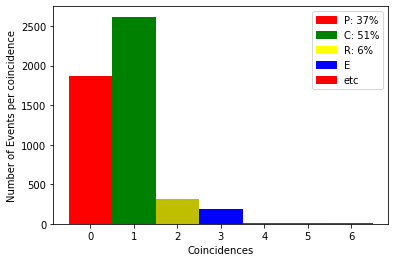

In [4]:
unique_labels = {}
for label in df['coincidence22']:
    if label in unique_labels:
        unique_labels[label] += 1
    else:
        unique_labels[label] = 1

print('Unique labels:', unique_labels)
import matplotlib.pyplot as plt
colors = {'P: 37%':'red', 'C: 51%':'green', 'R: 6%':'yellow', 'E':'blue', 'etc':'red'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.bar(list(range(len(unique_labels))), unique_labels.values(), 1, color=['r', 'g', 'y', 'b', 'r'])
plt.ylabel('Number of Events per coincidence')
plt.xlabel('Coincidences')

plt.legend(handles, labels)


plt.show()

In [27]:
import numpy as np
from collections import defaultdict
import time
mu, sigma = 0.0, 0.000000018
mu1, sigma1 = 0.0, 17.35881104 #  511 keV * 8% FWHM/ 2.355
rows = []
compton_limit = 1
photoelec_limit = 2
with open('ShrinkBig.dat') as f:
	for line in f:
		this_line = line.split()
		elem_10 = float(this_line[10])+ np.random.normal(mu, sigma)
		this_line[10] = str(elem_10)
		elem_11 = float(this_line[11]) * 1000
		elem_11_1 = elem_11 + np.random.normal (mu1, sigma1)
		if elem_11_1 >= 10:
			this_line[11] = str(elem_11_1)
		rows.append(this_line)

rows = sorted(rows, key=lambda x: float (x[10]))

groups = defaultdict(list)
c = 0
p = 0
time_interval = 0.00000002
for row in rows:
	i = int(float(row[10])//time_interval + 1)				
	groups[str(i)].append(row)
unvalid_groups = []

for item in groups:
	compton = 0
	PhotoElec = 0
	for elem in groups[item]:
		if elem[-3] == "Compton":
			compton += 1
		elif elem[-3] == "PhotoElectric":
			PhotoElec += 1
	# if compton <= compton_limit  or PhotoElec !=photoelec_limit: # ghablan in bud!
	if compton != compton_limit or PhotoElec != photoelec_limit: # Nana

		unvalid_groups.append(item)



for unvalid in unvalid_groups:
	if unvalid in groups:
		del groups[unvalid]
print("Family Numbers = ", len(groups))


# t0 = time.time()

# # writing the family members into a dat file
# with open('ShrinkBinnedBlurred4.csv', 'w') as f:
# 	for family in groups:
# 		for member in groups[family]:
# 			line = "\t".join(member)
# 			f.write(line)
# 			f.write("\n")

# 		f.write("\r")
# 		f.write("\n")


Family Numbers =  7011


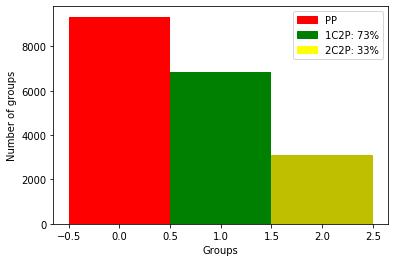

In [40]:
Family_Numbers =  [9341, 6842, 3089]
# unique_labels = {}
# for label in df['coincidence22']:
#     if label in unique_labels:
#         unique_labels[label] += 1
#     else:
#         unique_labels[label] = 1

# print('Family Numbers:', len(groups))
import matplotlib.pyplot as plt
colors = {'PP':'red', '1C2P: 73%':'green', '2C2P: 33%':'yellow'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.bar(list(range(len(Family_Numbers))),Family_Numbers, 1, color=['r', 'g', 'y'])
plt.ylabel('Number of groups')
plt.xlabel('Groups')
plt.legend(handles, labels)
plt.show()

# How to shrink Big Data and take part of it!

In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import time
import numpy as np

In [2]:
t0 = time.time()
n_lines = 0
with open("ascii_output_lessSource_0_to_16sHits.dat") as f:
    for line in f:
        n_lines += 1
print("time spent: ", time.time()-t0, '(s)')
print("number of lines", n_lines)

time spent:  98.75781011581421 (s)
number of lines 110036263


In [3]:
fraction = 0.01
dict = {'time': [], 'energy': [], 'x': [], 'y': [], 'z': [], 'coincidence': []}
with open("ascii_output_lessSource_0_to_16sHits.dat") as f:
    with open("Shrink.dat",'w') as g:
        counter = 0
        for line in f:
            if np.random.rand() <= fraction:
                counter += 1
                g.write(line)
print(counter/n_lines*100, '% of the dataset is selected')

1.0007446363386585 % of the dataset is selected


In [36]:
np.random.rand()

0.6386366746607236

In [39]:
float(-8.560e+00)

-8.56

In [2]:
import pandas as pd
import numpy as np
from collections import defaultdict
# dict = {'time10': [], 'energy11': [], 'x13': [], 'y14': [], 'z15': [], 'coincidence22': []}
with open("ascii_output_lessSource_0_to_16sHits.dat") as f:
    with open("Shrink50Big.dat",'w') as g:
        counter = 0
        for line in f:
            counter +=1
            g.write(line)

            if counter >= 50000000:
                break

In [3]:
print(counter)

1000000
